# Result Analysis

This experiment tries to replicate the results published by [Stankevičiūtė et al. - 2021 .Conformal time-series forecasting](https://proceedings.neurips.cc/paper/2021/hash/312f1ba2a72318edaaa995a67835fad5-Abstract.html) and to analyze the effects of different correction functions on them.

In this notebook I analyse the results produced by running the experiment.

In [1]:
import logging
import os.path

import pandas as pd

from metrics.mae import MAE
from metrics.coverage_rate import CoverageRate, CoverageRateByTimeStep
from metrics.interval_width import MeanIntervalWidth

logging.basicConfig(level=logging.INFO, format='%(levelname)s %(filename)s:%(lineno)s %(funcName)s() %(message)s')

%pwd

In [2]:
experiment_group_dir = '../../../assets/experimental_results/exp_01_stankeviciute_correction'
experiment_dirs = ['bonferroni', 'independent', 'no']

## MAE

In [3]:
mae_results = {exp_dir: MAE.load(
    os.path.join(os.path.join(experiment_group_dir, exp_dir + '/summary'), MAE.snake_name())) for exp_dir in
    experiment_dirs}

print('underlying model mae on test set:', mae_results)

underlying model mae on test set: {'bonferroni': 0.1854371654756801, 'independent': 0.18557232331138673, 'no': 0.18633515334804865}


Since they all perform more or less the same, I won't dive deeper into it.

## Coverage Rate

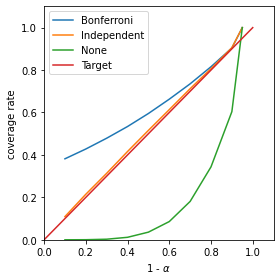

In [4]:
cr_results = [CoverageRate.load(
    os.path.join(os.path.join(experiment_group_dir, exp_dir + '/summary'), CoverageRate.snake_name())) for exp_dir in
    experiment_dirs]
CoverageRate.comparative_plot(cr_results, ['Bonferroni', 'Independent', 'None', 'Target'],
                              # save_path='comparison/' + CoverageRate.snake_name() + '.png'
                              )

In [5]:
cr_df = pd.DataFrame([[*cr_results[i][1]] for i in range(len(cr_results))], columns=1 - cr_results[0][0],
                     index=['Bonferroni', 'Independent', 'None']).T
cr_df.to_csv(os.path.join(experiment_group_dir, f'comparison/{CoverageRate.snake_name()}.csv'))
cr_df

,Bonferroni,Independent,None
0.10,0.38176,0.10940,0.00002
0.20,0.42790,0.21462,0.00044
0.30,0.47876,0.31338,0.00278
0.40,0.53392,0.41612,0.01176
0.50,0.59524,0.51564,0.03608
0.60,0.66274,0.61350,0.08592
0.70,0.73508,0.71210,0.18086
0.80,0.81558,0.80658,0.34370
0.90,0.90396,0.90524,0.60392
0.95,1.00000,1.00000,1.00000


### Coverage Rate By Time Step

In [6]:
cr_ts_results = [CoverageRateByTimeStep.load(os.path.join(
    os.path.join(experiment_group_dir, exp_dir + '/summary'),
    CoverageRateByTimeStep.snake_name())
) for exp_dir in experiment_dirs]

In [7]:
cr_ts_df = pd.DataFrame([[*cr_ts_results[i][1]] for i in range(len(cr_ts_results))], columns=1 - cr_ts_results[0][0],
                        index=['Bonferroni', 'Independent', 'None']).T
cr_ts_df.to_csv(os.path.join(experiment_group_dir, f'comparison/{CoverageRateByTimeStep.snake_name()}.csv'))
cr_ts_df

,Bonferroni,Independent,None
0.10,"[0.8200200000000002, 0.8203200000000003, 0.821...","[0.6318400000000002, 0.63362, 0.63262000000000...","[0.10277999999999995, 0.10206, 0.1009999999999..."
0.20,"[0.8394199999999999, 0.83974, 0.84169999999999...","[0.7282799999999995, 0.7257600000000001, 0.724...","[0.20254000000000005, 0.19982, 0.1989200000000..."
0.30,"[0.8587399999999996, 0.8582400000000001, 0.861...","[0.7872599999999998, 0.7851, 0.785139999999999...","[0.3018799999999999, 0.29983999999999994, 0.30..."
0.40,"[0.8779999999999998, 0.8789200000000004, 0.880...","[0.8342399999999996, 0.8324599999999998, 0.832...","[0.4016800000000002, 0.40049999999999986, 0.40..."
0.50,"[0.8986400000000008, 0.8982000000000007, 0.900...","[0.8731200000000001, 0.8714599999999996, 0.870...","[0.5030999999999999, 0.49968, 0.50014, 0.50076..."
0.60,"[0.9187400000000003, 0.9180800000000001, 0.920...","[0.9045400000000002, 0.9018200000000002, 0.903...","[0.6031799999999998, 0.60064, 0.59921999999999..."
0.70,"[0.9386800000000004, 0.9378399999999997, 0.939...","[0.9337200000000001, 0.9309799999999997, 0.931...","[0.70572, 0.7009800000000002, 0.69987999999999..."
0.80,"[0.9592799999999994, 0.9582399999999995, 0.960...","[0.9570000000000001, 0.9566399999999996, 0.956...","[0.8047200000000002, 0.8014800000000001, 0.800..."
0.90,"[0.9792199999999995, 0.9791199999999998, 0.980...","[0.9804999999999993, 0.9799599999999999, 0.979...","[0.90286, 0.9006800000000003, 0.90044000000000..."
0.95,"[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]","[1.0, 1.0, 1.0, 1.0, 1.0]"


## Interval width

In [8]:
miw_results = [MeanIntervalWidth.load(
    os.path.join(os.path.join(experiment_group_dir, exp_dir + '/summary'), MeanIntervalWidth.snake_name())) for exp_dir
    in
    experiment_dirs]

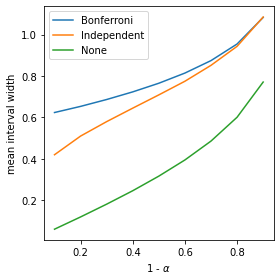

In [9]:
MeanIntervalWidth.comparative_plot(miw_results, ['Bonferroni', 'Independent', 'None'],
                                   save_path=os.path.join(experiment_group_dir,
                                                          f'comparison/{MeanIntervalWidth.snake_name()}.png'))

In [10]:
miw_df = pd.DataFrame([[*miw_results[i][1]] for i in range(len(miw_results))], columns=1 - miw_results[0][0],
                      index=['Bonferroni', 'Independent', 'None']).T
miw_df.to_csv(os.path.join(experiment_group_dir, 'comparison/mean_interval_width.csv'))
miw_df

,Bonferroni,Independent,None
0.10,0.623357,0.419350,0.059521
0.20,0.653047,0.509563,0.118750
0.30,0.686273,0.579428,0.180539
0.40,0.723134,0.644534,0.245423
0.50,0.764912,0.708650,0.316032
0.60,0.814039,0.774530,0.394102
0.70,0.874302,0.851442,0.485387
0.80,0.954559,0.943255,0.600585
0.90,1.082809,1.084965,0.770626
0.95,inf,inf,inf
